In [12]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='whitegrid', font_scale=1.75)
from visualize import *
#import plot_help as db
import cv2


In [13]:
#import matlab.engine
#eng = matlab.engine.start_matlab()


In [14]:
dirname = '../figures/'
#os.makedirs(dirname, exist_ok=True)
save_figs = True
def save(n, ext='.png', save_figs=True, **kwargs):
    if save_figs==True:
        kwargs.setdefault('bbox_inches', 'tight')
        kwargs.setdefault('pad_inches', 0)
        kwargs.setdefault('transparent', True)
        plt.savefig(os.path.join(dirname, n + ext), **kwargs)


In [15]:
def get_all_particles(path_dict,iteration):
    res_dict = {}
    for key, value in path_dict.items():
        pickle_in = open(os.path.join(value,"data/iter_"+str(iteration)+".pickle"),"rb")
        data = pickle.load(pickle_in)
        res_dict[key] = data
    return res_dict

In [ ]:
exp_path = 'D:/Data/OptSync/'
exp_name  = 'synthetic'
res_path_prod_particles_no_weights = {
    'MMD: Euclidean':exp_path+'2114'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2110'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2115'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2105'+exp_name,
}
res_path_prod_particles_with_weights = {
    'MMD: Euclidean':exp_path+'2119'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2109'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2117'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2107'+exp_name,
}

res_path_no_weights = {
    'MMD: Euclidean':exp_path+'2116'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2108'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2111'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2104'+exp_name,
}
res_path_with_weights = {
    'MMD: Euclidean':exp_path+'2118'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2112'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2113'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2106'+exp_name,
}
res_path = res_path_prod_particles_no_weights

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = False
res_dicts = get_res(res_path,refresh=refresh)

In [20]:
exp_path = 'D:/Data/OptSync'
exp_name  = 'FountainP11'
res_path = {'mmd: Geodesic':  exp_path + '/synthetic/synthetic_prod_true_N_2_noise_-1.0_B_noise_-1.0_unfaithfulness_false/mmd_power_quaternion__with_weights_RM_product/0'}
#res_path = {'mmd: Geodesic':  exp_path + '/synthetic/synthetic_prod_true_N_2_noise_-1.0_B_noise_-1.0_unfaithfulness_false/sinkhorn_power_quaternion__with_weights_RM_product/0'}
#res_path = {'Sinkhorn: Geodesic':  exp_path + '/FountainP11/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/sinkhorn_power_quaternion__with_weights_RM_product/0'}
print(res_path)

colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = False
res_dicts = get_res(res_path,refresh=refresh)


{'mmd: Geodesic': 'D:/Data/OptSync/synthetic/synthetic_prod_true_N_2_noise_-1.0_B_noise_-1.0_unfaithfulness_false/mmd_power_quaternion__with_weights_RM_product/0'}


In [6]:
print( res_path.items())

dict_items([('Sinkhorn: Geodesic', 'D:/Data/OptSync/FountainP11/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/sinkhorn_power_quaternion__with_weights_RM_product/0')])


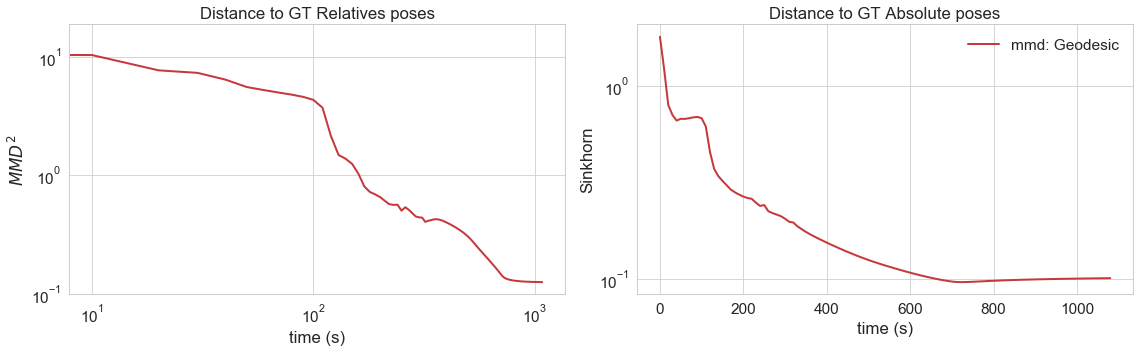

In [21]:
num_fig = 2
fig, ax = plt.subplots(1,num_fig, figsize=(8*num_fig,5))

value = 'loss'
xaxis = 'iteration'
refresh=  True
plot_from_dict(ax[0],res_dicts, xaxis, value, color_dict)
ax[0].set_title('Distance to GT Relatives poses')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$MMD^2$')
ax[0].set_xlabel('time (s)')
#ax[0].legend()

value = 'eval_dist'
xaxis = 'iteration'
plot_from_dict(ax[1],res_dicts, xaxis,  value, color_dict)
ax[1].set_title('Distance to GT Absolute poses')
ax[1].set_xscale('linear')
ax[1].set_yscale('log')
ax[1].set_ylabel('Sinkhorn')
ax[1].set_xlabel('time (s)')
ax[1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'loss_sinkhorn_vs_mmd'
save(filename)


In [26]:
exp_path = '/nfs/data/michaela/projects/OptSync/synthetic/synthetic_prod_false_N_4_noise_0.25_B_noise_-1.0_unfaithfulness_false/'
exp_mmd_quat  = 'Np_10_opt_SGD_pow_2_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl  = 'Np_10_opt_SGD_pow_2_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat  = 'Np_10_opt_SGD_pow_2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl  = 'Np_10_opt_SGD_pow_2_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
exp_mmd_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
exp_path_2 = '/nfs/data/michaela/projects/OptSync/new_synthetic/synthetic_prod_false_N_4_noise_0.25_B_noise_-1.0_unfaithfulness_false/'


res_path_2 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'85',
    'MMD: Q-C':exp_path+exp_mmd_quat+'87',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'92',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'88',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'86',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'84',
    'Sinkhorn: E-UC':exp_path+exp_sink_eucl_unconstraned+'91',
    'Sinkhorn: Q-UC':exp_path+exp_sink_quat_unconstraned+'95',
}
res_path_5 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'89',
    'MMD: Q-C':exp_path+exp_mmd_quat+'93',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'98',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'102',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'90',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'94',
    'Sinkhorn: E-UC':exp_path+exp_sink_eucl_unconstraned+'103',
    'Sinkhorn: Q-UC':exp_path+exp_sink_quat_unconstraned+'107',
}

res_path_7 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'96',
    'MMD: Q-C':exp_path_2+exp_mmd_quat+'113',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'101',
    'Sinkhorn: Q-C':exp_path_2+exp_sink_quat+'111',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'100',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'106',
    'Sinkhorn: E-UC':exp_path+exp_sink_eucl_unconstraned+'104',
    'Sinkhorn: Q-UC':exp_path+exp_sink_quat_unconstraned+'97',
}


res_path = res_path_7

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = False
res_dicts = get_res(res_path,refresh=refresh)

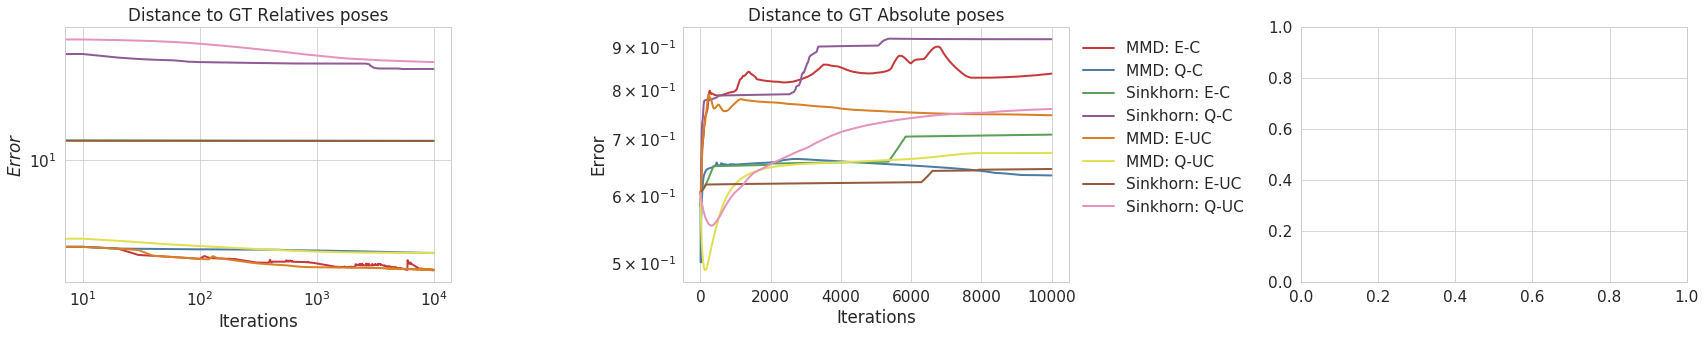

In [27]:
num_fig = 3
fig, ax = plt.subplots(1,num_fig, figsize=(8*num_fig,5))

value = 'loss'
xaxis = 'iteration'
refresh=  True
plot_from_dict(ax[0],res_dicts, xaxis, value, color_dict)
ax[0].set_title('Distance to GT Relatives poses')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$Error$')
ax[0].set_xlabel('Iterations')
#ax[0].legend()

value = 'eval_dist'
xaxis = 'iteration'
plot_from_dict(ax[1],res_dicts, xaxis,  value, color_dict)
ax[1].set_title('Distance to GT Absolute poses')
ax[1].set_xscale('linear')
ax[1].set_yscale('log')
ax[1].set_ylabel('Error')
ax[1].set_xlabel('Iterations')
#ax[1].set_xlim('Iterations')
ax[1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'loss_sinkhorn_vs_mmd'
save(filename)

In [17]:

#eng.addpath('bingham', nargout=0)
#eng.addpath('bingham/tools', nargout=0)
#eng.addpath('bingham/visualization', nargout=0)

# The quality of the rendering. It is super slow so for testing I always set it to 50 and for the final renderings back to 400!
quality = 50

# Each element of the list is a list of quaternions for the bingham distribution
distributions = []

# random distributions made of quaternions for testing
bingham_1 = [[0.7, 0.3, -0.1, 0.2], [0.6, 0.35, -0.16, 0.15],[0.5, 0.2, -0.4, -0.2], [0.4, 0.1, -0.4, -0.2]]


bingham_2 = [[1, 0, 0, 0], [1, 0., 0, 0]]

# normalize quats
bingham_1 = np.asarray(bingham_1)
bingham_2 = np.asarray(bingham_2)

bingham_1 /= np.linalg.norm(bingham_1, axis=1, keepdims=True)
bingham_2 /= np.linalg.norm(bingham_2, axis=1, keepdims=True)

# adding the distributions to the list and convert them to matlab
distributions.append(matlab.double(bingham_1.tolist()))
distributions.append(matlab.double(bingham_2.tolist()))


# GT if not set to None then a green cross will be superimposed at this position as GT quaternion
# gt = [q_gt, -q_gt]
gt = np.asarray([[0.7, 0.3, -0.1, 0.2], [-0.7, -0.3, 0.1, -0.2]])
gt /= np.linalg.norm(gt, axis=1, keepdims=True)

# plotting!
bingham = db.get_bingham(eng, distributions, GT=None, precision=quality) /255.# without ground truth
bingham_gt = db.get_bingham(eng, distributions, GT=gt, precision=quality) / 255. # with ground truth

#db.fit()

# show on display with and without gt
#cv2.imshow('bingham', cv2.hconcat([bingham, bingham_gt]))
#cv2.waitKey(0)


MatlabExecutionError: Too many output arguments.


In [ ]:
#aa = cv2.hconcat([bingham])
plt.imshow(bingham)




In [ ]:
iteration = 0
out_dict0 = get_all_particles(res_path,iteration)
iteration = 9990
out_dict = get_all_particles(res_path,iteration)


In [ ]:
aa = 1.*out_dict0['Sinkhorn: PowerQuaternion']['particles']

In [ ]:

out_dict0['Sinkhorn: PowerQuaternion']['true_particles'],out_dict['Sinkhorn: PowerQuaternion']['particles']

In [ ]:
iterations = [0,10,100,1000,9990]
#iterations = [0,100]
method = 'Sinkhorn: PowerQuaternion'
num_cameras = 4
bingham_fits = make_bg_spheres_from_dict(eng,res_path,iterations,method,num_cameras,GT=False)

In [ ]:
#bingham_fits = list(map(list, zip(*bingham_fits)))
image = concat_tile(bingham_fits)
plt.imshow(image)
#cat_binghams = cv2.vconcat(bingham_fits)
cv2.imwrite('bingham.jpg',image)


In [ ]:
plt.imshow(cat_binghams)